<a href="https://colab.research.google.com/github/MikhailGalperin/MyFirstRep/blob/main/Homework__26nov2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1
Создайте массив массив из 100 элементов (от 1 до 100), переформатируйте в формат (10 * 10), сделайте слайсинг с шагом 2 по каждой оси.

In [109]:
import numpy as np
array1 = np.arange(1,101)
array2 = array1.reshape(10,10)
array3 = array2[::2,::2]
print(array3)

[[ 1  3  5  7  9]
 [21 23 25 27 29]
 [41 43 45 47 49]
 [61 63 65 67 69]
 [81 83 85 87 89]]


## Задание 2

Написать функцию, которая по заданной длине последовательности находит среднее арифметическое ее членов.

Реализуйте задачу с и без помощи numpy, сравните время выполнения

In [71]:
%%time
dlina_pos_1 = 100_000_000

def average_1(x):
  summ = 0
  for i in range (1, dlina_pos_1+1):
    summ += i
  return summ/i

print(average_1(dlina_pos_1))

50000000.5
CPU times: user 5.95 s, sys: 3.94 ms, total: 5.95 s
Wall time: 5.96 s


In [79]:
%%time
import numpy as np
dlina_pos_1 = 100_000_000

def average_2(x):
  dlina_pos_2 = np.arange(dlina_pos_1+1)
  return(np.sum(dlina_pos_2)/dlina_pos_1)

print(average_2(dlina_pos_1))

50000000.5
CPU times: user 298 ms, sys: 974 µs, total: 299 ms
Wall time: 306 ms


In [78]:
#хотя, если решать конкретную задачу, проще всего, по-моему, так:

%%time
dlina_pos_1 = 100_000_000

def average_3(x):
  return((dlina_pos_1 + 1)/2)

print(average_3(dlina_pos_1))

50000000.5
CPU times: user 95 µs, sys: 0 ns, total: 95 µs
Wall time: 99.4 µs


Задание 3 *(необязательно)
Задан Series объект s, найти индекс первого элемента отсортированного s, где значения больше 5

In [181]:
# задано изначально
import numpy as np
import pandas as pd
r = np.random.RandomState(1)
s = pd.Series(r.uniform(0, 10, 100))
s = s.sort_values().reset_index(drop=True)

for i in s.index:
  if s[i] > 5:
    break
print(i)

#проверка, что это первый больше 5
print('проверка', '|', i-1, s[i-1], '|', i, s[i])

51
проверка | 50 4.9157315928033825 | 51 5.148891120583086


## Задание 4

Предположим, что мы наблюдаем за некоторым признаком нашего датасета, но в данных есть пропуски. Ваша задача: реализовать алгоритм заполнения пропущенных значений последним известным с помощью средств python и pandas. (подсказка: вам может помочь функция np.isnan(), которая возвращает True, если число - nan. Для реализации с пандас стоит посмотреть на метод .fillna).

Изначальный код с инициализацией такого датасета предоставлен.

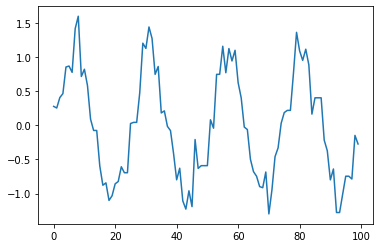

In [200]:
import numpy as np
import pandas as pd

# импортируем библиотеку для создания шума
import random
# библиотека для визуализации
import matplotlib.pyplot as plt

# создадим наши данные и добавим к каждой точке синусоиды случайный шум
a = np.linspace(0, 25, 100)
a = np.sin(a) + [random.gauss(0, 0.2) for i in range(len(a))]

# создадим 10 случайных пропусков
for i in range(10):
    a[random.randint(0, len(a) - 1)] = None
# создадим датафрейм
df = pd.DataFrame({'target':a})

# ваш код тут
for i in range(len(a)):
  if np.isnan(a[i]):
    a[i] = a[i-1]

# отобразим
df = pd.DataFrame({'target':a})
plt.plot(df.target.values)

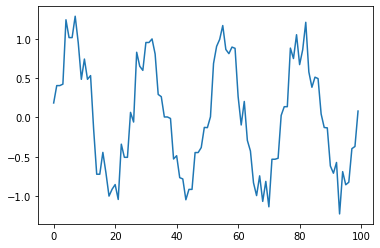

In [207]:
import numpy as np
import pandas as pd

# импортируем библиотеку для создания шума
import random
# библиотека для визуализации
import matplotlib.pyplot as plt

# создадим наши данные и добавим к каждой точке синусоиды случайный шум
a = np.linspace(0, 25, 100)
a = np.sin(a) + [random.gauss(0, 0.2) for i in range(len(a))]

# создадим 10 случайных пропусков
for i in range(10):
    a[random.randint(0, len(a) - 1)] = None
# создадим датафрейм
df = pd.DataFrame({'target':a})

# ваш код тут
df = df.fillna(method = 'bfill')

# отобразим
plt.plot(df.target.values)

Задание 5 *(необязательно)
Имеется небольшой игрушечный датафрейм, в котором необходимо провести несколько типов фильтраций (ответы ищите в решениях) и отобразить результат:

всех, кто старше 40
всех, кто имеет доход выше среднего по датасету
всех, кто имеет доход выше среднего по датасету, но надежность ниже среднего по датасету
создать новые столбцы:

важность клиента = доход * надежность
возможная долгосрочность клиента = важность клиента * (средний возраст по датасету - возраст клиента)
подсказка: двойные условия записываются так: (условие 1) & (условие 2)

** примечание: столбцы не имеют отношения к реальным формулам или моделям, они необходимы только для наглядности

In [246]:
# создадим тестовый датасет
df = pd.DataFrame({
    'имя': ['Петя', 'Вася', 'Аня', 'Света'],
    'возраст': [45, 26, 41 , 21],
    'доход': [100000, 80000, 150000, 60000],
    'надежность клиента (0..1)': [0.65, 0.74, 0.87, 0.68],
    'пол': ['муж', 'муж', 'жен', 'жен']},
    index=[0, 1, 2, 3])

# ваш код тут

df['важность клиента'] = df['доход'] * df['надежность клиента (0..1)']
df['возможная долгосрочность клиента'] = df['важность клиента'] * (df['возраст'] - df['возраст'].mean(axis=0))

#весь датафрейм
#возможная долгосрочность клиента рассчитана по формуле, как в задании, но в ряде случаев она получается отрицательной
print('весь датафрейм')
print(df)

#старше сорока
df1 = df.loc[df['возраст'] > 40]
print()
print('старше сорока')
print(df1)

#доход выше среднего
df2 = df.loc[df['доход'] > df['доход'].mean(axis=0)]
print()
print('доход выше среднего')
print(df2)

#доход выше среднего, но надёжность ниже среднего
df3 = df.loc[(df['доход'] > df['доход'].mean(axis=0)) & (df['надежность клиента (0..1)'] < df['надежность клиента (0..1)'].mean(axis=0))]
print()
print('доход выше среднего, но надёжность ниже среднего')
print(df3)


весь датафрейм
     имя  возраст  ...  важность клиента  возможная долгосрочность клиента
0   Петя       45  ...           65000.0                          763750.0
1   Вася       26  ...           59200.0                         -429200.0
2    Аня       41  ...          130500.0                         1011375.0
3  Света       21  ...           40800.0                         -499800.0

[4 rows x 7 columns]

старше сорока
    имя  возраст  ...  важность клиента  возможная долгосрочность клиента
0  Петя       45  ...           65000.0                          763750.0
2   Аня       41  ...          130500.0                         1011375.0

[2 rows x 7 columns]

доход выше среднего
    имя  возраст  ...  важность клиента  возможная долгосрочность клиента
0  Петя       45  ...           65000.0                          763750.0
2   Аня       41  ...          130500.0                         1011375.0

[2 rows x 7 columns]

доход выше среднего, но надёжность ниже среднего
    имя  возра